<a href="https://colab.research.google.com/github/RuchitShivani/SDG-Project/blob/main/Investment_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('complete_renewable.csv')

# View first few rows
print(df.head())


     Country  Year Energy Type  Production (GWh)  Installed Capacity (MW)  \
0        USA  2011       Solar       85404.69003              5549.794323   
1  Australia  2008  Geothermal       22205.06938             43211.593800   
2     Canada  2013     Biomass       94102.73204              6139.117212   
3      Japan  2010     Biomass       88771.93291             40323.639260   
4      China  2018       Solar       93288.40858             30755.403060   

   Investments (USD)  Population           GDP  Energy Consumption  \
0       5.604125e+09  1064007213  1.775280e+14         369654.6442   
1       6.361886e+08  1033255852  6.435370e+13         771781.6363   
2       6.158680e+09    14895124  1.567930e+14         342707.1529   
3       8.526116e+09  1448827283  1.350460e+14         498839.5743   
4       5.086237e+09  1499494307  8.677960e+13         819064.3628   

   Energy Exports  ...  Economic Freedom Index  Ease of Doing Business  \
0    93087.198200  ...               49.21

In [13]:
print(df.columns.tolist())  # Show exact column names


['Country', 'Year', 'Energy Type', 'Production (GWh)', 'Installed Capacity (MW)', 'Investments (USD)', 'Population', 'GDP', 'Energy Consumption', 'Energy Exports', 'Energy Imports', 'CO2 Emissions', 'Renewable Energy Jobs', 'Government Policies', 'R&D Expenditure', 'Renewable Energy Targets', 'Average Annual Temperature', 'Annual Rainfall', 'Solar Irradiance', 'Wind Speed', 'Hydro Potential', 'Geothermal Potential', 'Biomass Availability', 'Energy Storage Capacity', 'Grid Integration Capability', 'Electricity Prices', 'Energy Subsidies', 'International Aid for Renewables', 'Public Awareness', 'Energy Efficiency Programs', 'Urbanization Rate', 'Industrialization Rate', 'Energy Market Liberalization', 'Renewable Energy Patents', 'Educational Level', 'Technology Transfer Agreements', 'Renewable Energy Education Programs', 'Local Manufacturing Capacity', 'Import Tariffs on Energy Equipment', 'Export Incentives for Energy Equipment', 'Natural Disasters', 'Political Stability', 'Corruption P

In [14]:
df.columns = df.columns.str.strip()  # Trim spaces


In [16]:
# Group by Country and Year, then compute total Energy Consumption
region_trend = df.groupby(["Country", "Year"])["Energy Consumption"].sum().reset_index()

# Pivot to get time-series format
region_pivot = region_trend.pivot(index="Year", columns="Country", values="Energy Consumption")

# Fill missing values using interpolation
region_pivot = region_pivot.interpolate().fillna(method="bfill")

# Display first few rows
region_pivot.head()


<ipython-input-16-b909d549c5e1>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  region_pivot = region_pivot.interpolate().fillna(method="bfill")


Country,Australia,Brazil,Canada,China,France,Germany,India,Japan,Russia,USA
Year,,,,,,,,,,
2000,4.095342e+06,3.191030e+06,2.896623e+06,7.484680e+06,5.828300e+06,5.782274e+06,2.122287e+06,5.095020e+06,4.710783e+06,6.542957e+06
2001,8.042543e+06,4.774672e+06,7.694397e+06,4.110207e+06,7.544151e+06,1.984858e+06,3.933887e+06,8.354307e+06,5.924429e+06,5.009910e+06
2002,6.110483e+06,5.451225e+06,6.328089e+06,2.150276e+06,8.005533e+06,3.813953e+06,4.435408e+06,6.281860e+06,7.134224e+06,4.886673e+06
2003,5.110173e+06,2.997329e+06,4.143578e+06,7.886360e+06,5.947438e+06,7.404054e+06,1.785689e+06,5.127825e+06,4.576238e+06,6.008518e+06
2004,6.268315e+06,2.684827e+06,5.527628e+06,7.502612e+06,5.776464e+06,4.046536e+06,6.614227e+06,6.819571e+06,4.111245e+06,3.699800e+06


In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare training data
X = region_pivot.index.values.reshape(-1, 1)  # Years as input
predictions = {}

# Train a model per country
for country in region_pivot.columns:
    y = region_pivot[country].values  # Energy Consumption
    model = LinearRegression()
    model.fit(X, y)  # Train model

    # Predict for the next 10 years
    future_years = np.arange(X.max() + 1, X.max() + 11).reshape(-1, 1)
    predictions[country] = model.predict(future_years)

# Convert predictions into a DataFrame
future_df = pd.DataFrame(predictions, index=future_years.flatten())

# Display first few predictions
future_df.head()


,Australia,Brazil,Canada,China,France,Germany,India,Japan,Russia,USA
2024,3.530302e+06,5.757037e+06,5.295363e+06,4.897029e+06,5.727208e+06,4.279255e+06,6.548383e+06,4.742583e+06,4.917991e+06,4.724140e+06
2025,3.429277e+06,5.830150e+06,5.324125e+06,4.871677e+06,5.694339e+06,4.236729e+06,6.649001e+06,4.668766e+06,4.903983e+06,4.713942e+06
2026,3.328252e+06,5.903264e+06,5.352888e+06,4.846326e+06,5.661470e+06,4.194204e+06,6.749619e+06,4.594950e+06,4.889974e+06,4.703743e+06
2027,3.227228e+06,5.976377e+06,5.381650e+06,4.820974e+06,5.628601e+06,4.151678e+06,6.850236e+06,4.521133e+06,4.875966e+06,4.693545e+06
2028,3.126203e+06,6.049491e+06,5.410412e+06,4.795622e+06,5.595732e+06,4.109152e+06,6.950854e+06,4.447317e+06,4.861957e+06,4.683347e+06


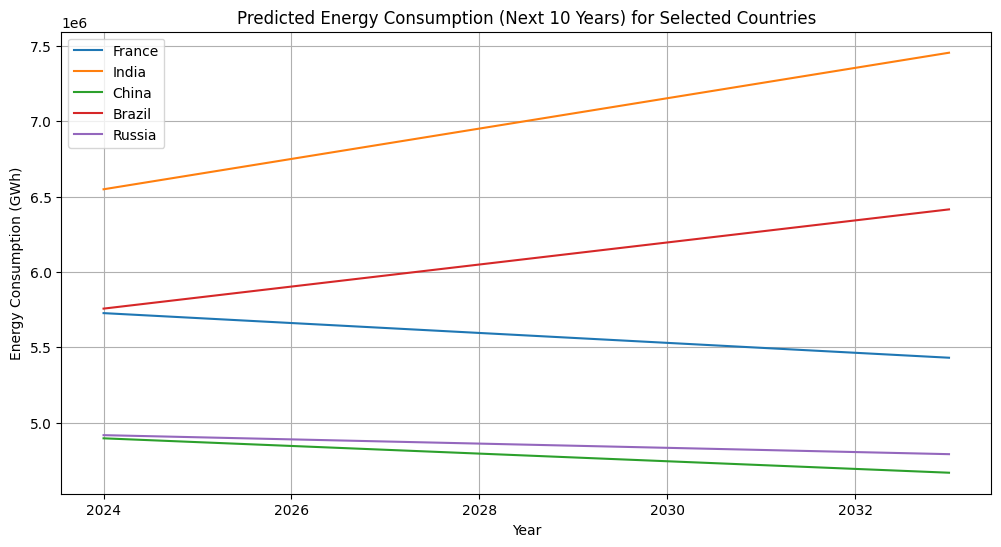

In [19]:
import matplotlib.pyplot as plt

# Select countries for plotting
selected_countries = ["France", "India", "China", "Brazil", "Russia"]

plt.figure(figsize=(12, 6))

for country in selected_countries:
    plt.plot(future_df.index, future_df[country], label=country)

plt.title("Predicted Energy Consumption (Next 10 Years) for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (GWh)")
plt.legend()
plt.grid()
plt.show()


In [20]:
# Define renewable energy types
renewable_types = ["Solar", "Wind", "Hydro", "Geothermal", "Biomass"]

# Filter dataset
renewable_df = df[df["Energy Type"].isin(renewable_types)]

# Aggregate renewable energy consumption by country and year
renewable_trend = renewable_df.groupby(["Country", "Year"])["Energy Consumption"].sum().reset_index()

# Pivot the data for time series
renewable_pivot = renewable_trend.pivot(index="Year", columns="Country", values="Energy Consumption")

# Fill missing values
renewable_pivot = renewable_pivot.interpolate().fillna(method="bfill")

# Display first few rows
renewable_pivot.head()


<ipython-input-20-e8ae13980402>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  renewable_pivot = renewable_pivot.interpolate().fillna(method="bfill")


Country,Australia,Brazil,Canada,China,France,Germany,India,Japan,Russia,USA
Year,,,,,,,,,,
2000,4.095342e+06,3.191030e+06,2.896623e+06,7.484680e+06,5.828300e+06,5.782274e+06,2.122287e+06,5.095020e+06,4.710783e+06,6.542957e+06
2001,8.042543e+06,4.774672e+06,7.694397e+06,4.110207e+06,7.544151e+06,1.984858e+06,3.933887e+06,8.354307e+06,5.924429e+06,5.009910e+06
2002,6.110483e+06,5.451225e+06,6.328089e+06,2.150276e+06,8.005533e+06,3.813953e+06,4.435408e+06,6.281860e+06,7.134224e+06,4.886673e+06
2003,5.110173e+06,2.997329e+06,4.143578e+06,7.886360e+06,5.947438e+06,7.404054e+06,1.785689e+06,5.127825e+06,4.576238e+06,6.008518e+06
2004,6.268315e+06,2.684827e+06,5.527628e+06,7.502612e+06,5.776464e+06,4.046536e+06,6.614227e+06,6.819571e+06,4.111245e+06,3.699800e+06


In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare training data
X = renewable_pivot.index.values.reshape(-1, 1)
renewable_predictions = {}

# Train a model per country
for country in renewable_pivot.columns:
    y = renewable_pivot[country].values
    model = LinearRegression()
    model.fit(X, y)  # Train model

    # Predict for the next 10 years
    future_years = np.arange(X.max() + 1, X.max() + 11).reshape(-1, 1)
    renewable_predictions[country] = model.predict(future_years)

# Convert predictions into a DataFrame
future_renewable_df = pd.DataFrame(renewable_predictions, index=future_years.flatten())

# Display first few predictions
future_renewable_df.head()


,Australia,Brazil,Canada,China,France,Germany,India,Japan,Russia,USA
2024,3.530302e+06,5.757037e+06,5.295363e+06,4.897029e+06,5.727208e+06,4.279255e+06,6.548383e+06,4.742583e+06,4.917991e+06,4.724140e+06
2025,3.429277e+06,5.830150e+06,5.324125e+06,4.871677e+06,5.694339e+06,4.236729e+06,6.649001e+06,4.668766e+06,4.903983e+06,4.713942e+06
2026,3.328252e+06,5.903264e+06,5.352888e+06,4.846326e+06,5.661470e+06,4.194204e+06,6.749619e+06,4.594950e+06,4.889974e+06,4.703743e+06
2027,3.227228e+06,5.976377e+06,5.381650e+06,4.820974e+06,5.628601e+06,4.151678e+06,6.850236e+06,4.521133e+06,4.875966e+06,4.693545e+06
2028,3.126203e+06,6.049491e+06,5.410412e+06,4.795622e+06,5.595732e+06,4.109152e+06,6.950854e+06,4.447317e+06,4.861957e+06,4.683347e+06


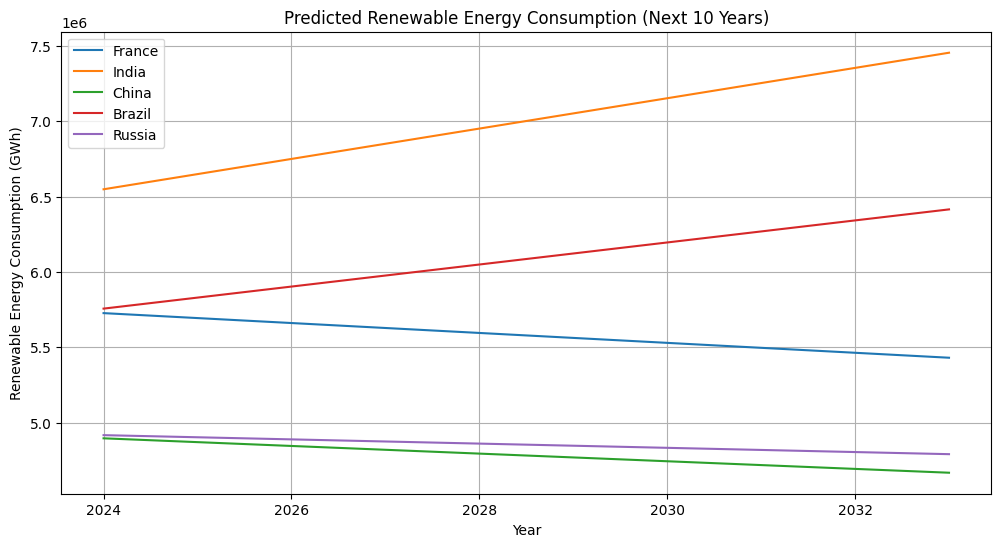

In [23]:
import matplotlib.pyplot as plt

# Select countries for plotting
selected_countries = ["France", "India", "China", "Brazil", "Russia"]

plt.figure(figsize=(12, 6))

for country in selected_countries:
    plt.plot(future_renewable_df.index, future_renewable_df[country], label=country)

plt.title("Predicted Renewable Energy Consumption (Next 10 Years)")
plt.xlabel("Year")
plt.ylabel("Renewable Energy Consumption (GWh)")
plt.legend()
plt.grid()
plt.show()


In [24]:
# Filter only renewable energy types
renewable_types = ["Solar", "Wind", "Hydro", "Geothermal", "Biomass"]
renewable_df = df[df["Energy Type"].isin(renewable_types)]

# Aggregate renewable energy consumption & investments by country and year
renewable_trend = renewable_df.groupby(["Country", "Year"])[["Energy Consumption", "Investments (USD)"]].sum().reset_index()

# Pivot for time series modeling
renewable_pivot = renewable_trend.pivot(index="Year", columns="Country", values=["Energy Consumption", "Investments (USD)"])

# Fill missing values
renewable_pivot = renewable_pivot.interpolate().fillna(method="bfill")

# Rename columns for easier access
renewable_pivot.columns = [f"{col[0]}_{col[1]}" for col in renewable_pivot.columns]

# Display first few rows
renewable_pivot.head()


<ipython-input-24-cd052c273294>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  renewable_pivot = renewable_pivot.interpolate().fillna(method="bfill")


,Energy Consumption_Australia,Energy Consumption_Brazil,Energy Consumption_Canada,Energy Consumption_China,Energy Consumption_France,Energy Consumption_Germany,Energy Consumption_India,Energy Consumption_Japan,Energy Consumption_Russia,Energy Consumption_USA,Investments (USD)_Australia,Investments (USD)_Brazil,Investments (USD)_Canada,Investments (USD)_China,Investments (USD)_France,Investments (USD)_Germany,Investments (USD)_India,Investments (USD)_Japan,Investments (USD)_Russia,Investments (USD)_USA
Year,,,,,,,,,,,,,,,,,,,,
2000,4.095342e+06,3.191030e+06,2.896623e+06,7.484680e+06,5.828300e+06,5.782274e+06,2.122287e+06,5.095020e+06,4.710783e+06,6.542957e+06,6.130445e+10,3.343208e+10,4.459232e+10,6.799387e+10,8.512995e+10,3.334511e+10,3.718408e+10,3.436183e+10,4.250040e+10,5.909951e+10
2001,8.042543e+06,4.774672e+06,7.694397e+06,4.110207e+06,7.544151e+06,1.984858e+06,3.933887e+06,8.354307e+06,5.924429e+06,5.009910e+06,7.397038e+10,5.041606e+10,1.045104e+11,5.265652e+10,6.840261e+10,3.468133e+10,3.104552e+10,6.166998e+10,4.174184e+10,3.987248e+10
2002,6.110483e+06,5.451225e+06,6.328089e+06,2.150276e+06,8.005533e+06,3.813953e+06,4.435408e+06,6.281860e+06,7.134224e+06,4.886673e+06,6.435451e+10,8.803627e+10,5.062993e+10,3.253998e+10,9.365270e+10,3.825025e+10,5.192059e+10,5.841866e+10,6.288472e+10,5.959432e+10
2003,5.110173e+06,2.997329e+06,4.143578e+06,7.886360e+06,5.947438e+06,7.404054e+06,1.785689e+06,5.127825e+06,4.576238e+06,6.008518e+06,3.027795e+10,2.608717e+10,4.989027e+10,6.415774e+10,7.926295e+10,6.620683e+10,2.919114e+10,4.146411e+10,3.946319e+10,5.290121e+10
2004,6.268315e+06,2.684827e+06,5.527628e+06,7.502612e+06,5.776464e+06,4.046536e+06,6.614227e+06,6.819571e+06,4.111245e+06,3.699800e+06,4.816857e+10,2.802602e+10,3.577242e+10,4.748527e+10,5.480399e+10,4.611855e+10,8.037601e+10,6.263069e+10,3.824900e+10,4.389384e+10


In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare training data
X_years = renewable_pivot.index.values.reshape(-1, 1)
future_years = np.arange(X_years.max() + 1, X_years.max() + 11).reshape(-1, 1)

renewable_predictions = {}

# Train a model per country using investment data
for country in df["Country"].unique():
    consumption_col = f"Energy Consumption_{country}"
    investment_col = f"Investments (USD)_{country}"

    if consumption_col in renewable_pivot.columns and investment_col in renewable_pivot.columns:
        X = renewable_pivot[[investment_col]].values  # Use investment as a feature
        y = renewable_pivot[consumption_col].values  # Energy consumption

        model = LinearRegression()
        model.fit(X, y)  # Train model

        # Predict energy consumption based on future investment trends
        future_investment = np.linspace(X.min(), X.max(), 10).reshape(-1, 1)
        renewable_predictions[country] = model.predict(future_investment)

# Convert predictions into a DataFrame
future_renewable_df = pd.DataFrame(renewable_predictions, index=future_years.flatten())

# Display first few predictions
future_renewable_df.head()


,USA,Australia,Canada,Japan,China,India,Germany,France,Brazil,Russia
2024,1.859117e+06,2.967041e+06,2.594028e+06,2.604342e+06,2.038133e+06,3.096112e+06,1.924358e+06,2.668671e+06,3.383181e+06,2.999226e+06
2025,2.389442e+06,3.465045e+06,3.305616e+06,3.300612e+06,2.686579e+06,3.612744e+06,2.575335e+06,3.479337e+06,3.732140e+06,3.462121e+06
2026,2.919768e+06,3.963050e+06,4.017204e+06,3.996882e+06,3.335024e+06,4.129375e+06,3.226311e+06,4.290004e+06,4.081099e+06,3.925016e+06
2027,3.450093e+06,4.461054e+06,4.728792e+06,4.693152e+06,3.983469e+06,4.646006e+06,3.877288e+06,5.100670e+06,4.430057e+06,4.387910e+06
2028,3.980419e+06,4.959059e+06,5.440380e+06,5.389423e+06,4.631914e+06,5.162637e+06,4.528265e+06,5.911337e+06,4.779016e+06,4.850805e+06


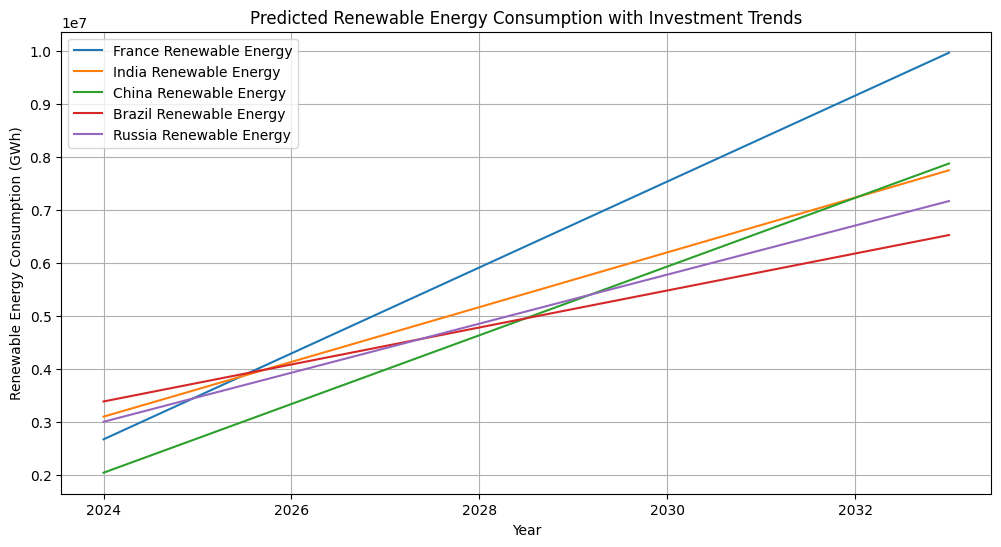

In [26]:
import matplotlib.pyplot as plt

# Select countries for plotting
selected_countries = ["France", "India", "China", "Brazil", "Russia"]

plt.figure(figsize=(12, 6))

for country in selected_countries:
    plt.plot(future_renewable_df.index, future_renewable_df[country], label=f"{country} Renewable Energy")

plt.title("Predicted Renewable Energy Consumption with Investment Trends")
plt.xlabel("Year")
plt.ylabel("Renewable Energy Consumption (GWh)")
plt.legend()
plt.grid()
plt.show()


In [27]:
import pickle

# Assuming your trained model is stored in a variable named 'model'
with open("renewable_energy_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as renewable_energy_model.pkl")


Model saved as renewable_energy_model.pkl
